## Fitting model

The loss depends on the network parameters, and we'll consider how to find
the parameter values that minimize this loss. This is known as *learning* the network’s
parameters or simply as training or fitting the model.
The process is to choose initial
parameter values and then iterate the following two steps: ($i$) compute the derivatives
(gradients) of the loss with respect to the parameters, and ($ii$) adjust the parameters
based on the gradients to decrease the loss. After many iterations, we hope to reach the
overall minimum of the loss function

**Gabor model** example:
$$f[x, \phi] = \sin[\phi_0 + 0.06 \cdot \phi_1 x] \cdot \exp \left( -\dfrac{(\phi_0 + 0.06 \cdot \phi_1 x)^2}{32.0} \right).$$

This **Gabor model** maps scalar input $x$ to scalar output $y$ and consists of a sinusoidal
component (creating an oscillatory function) multiplied by a negative exponential component (causing the amplitude to decrease as we move from the center). It has two
parameters $\phi= [\phi_0,\phi_1]^T$ , where $\phi_0 \in R$ determines the mean position of the function
and $\phi_1 \in R^+$ stretches or squeezes it along the $x$-axis.
Gabor model is commonly used in signal processing and image analysis. A Gabor function typically combines a sinusoidal wave with a Gaussian envelope.

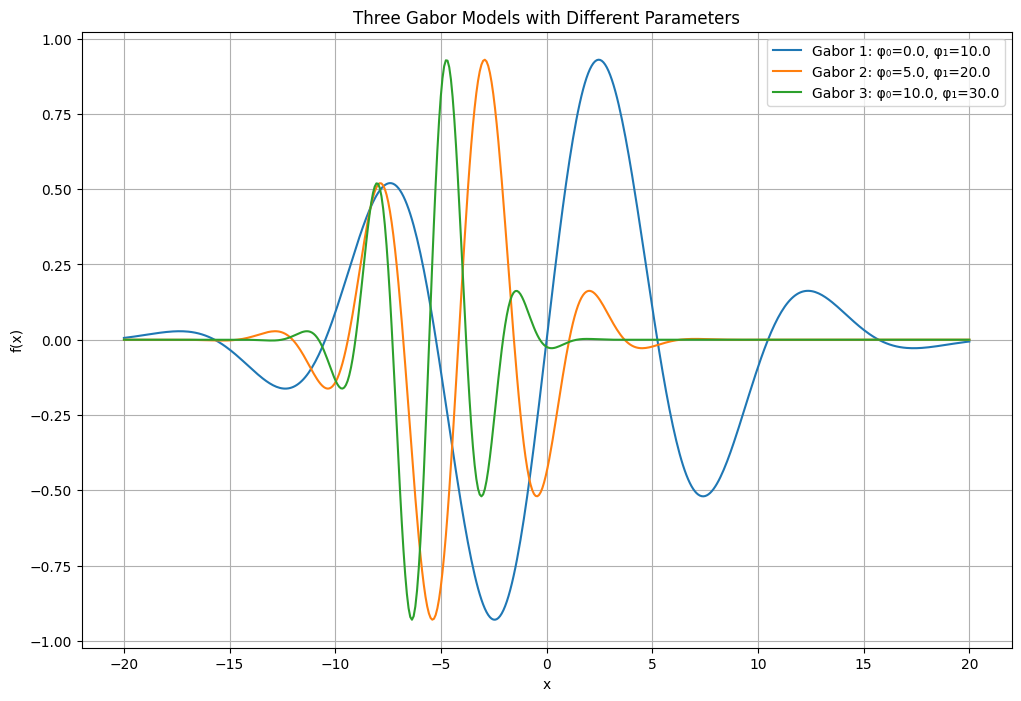

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gabor function definition
def gabor(x, phi0, phi1):
    argument = phi0 + 0.06 * phi1 * x
    gaussian_envelope = np.exp(- (argument ** 2) / 32.0)
    sinusoidal = np.sin(argument)
    return sinusoidal * gaussian_envelope

# Generate x values
x_range = np.linspace(-20, 20, 500)

# Define three sets of parameters
params = [
    (0.0, 10.0),
    (5.0, 20.0),
    (10.0, 30.0)
]

# Plotting
plt.figure(figsize=(12, 8))

# Loop through each parameter set and plot
for i, (phi0, phi1) in enumerate(params, 1):
    y = gabor(x_range, phi0, phi1)
    plt.plot(x_range, y, label=f'Gabor {i}: φ₀={phi0}, φ₁={phi1}')

# Add plot details
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Three Gabor Models with Different Parameters')
plt.legend()
plt.show()

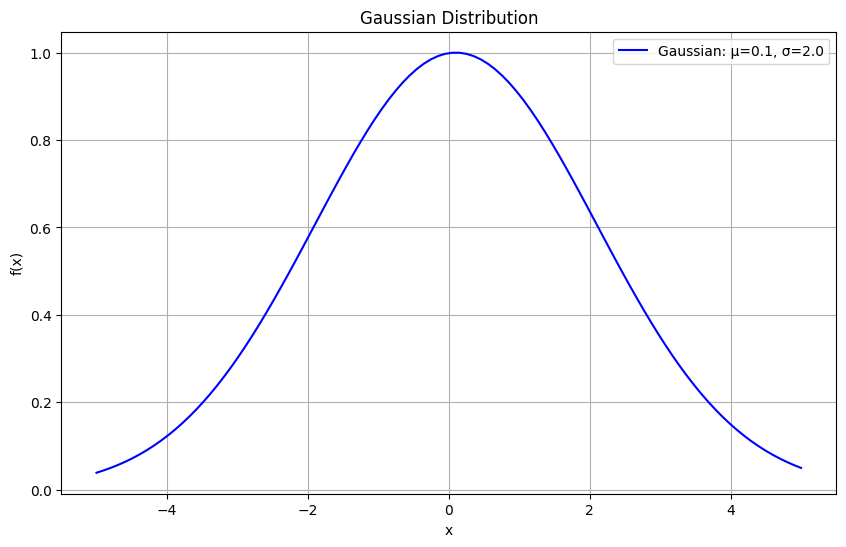

In [ ]:
# plotting uniformly (Gaussian dist) to further undrestand the concept.
import numpy as np
import matplotlib.pyplot as plt

# Gaussian function definition (without normalization for simplicity)
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Parameters to tune
mu = 0.1
sigma = 2.0

# Generate x values
x_range = np.linspace(-5, 5, 100)  # x values from -5 to 5

# Compute the Gaussian values
y = gaussian(x_range, mu, sigma)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, y, label=f'Gaussian: μ={mu}, σ={sigma}', color='b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()

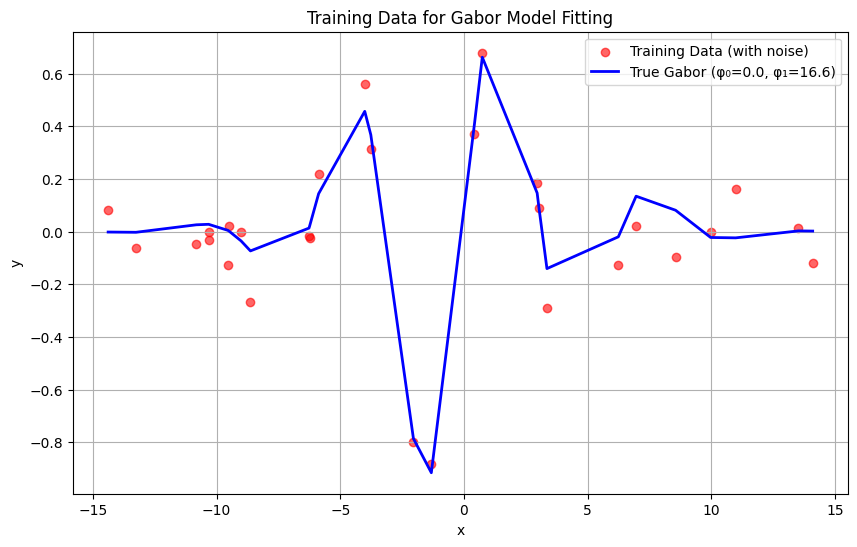

Generated Training Data:
x_1 = -3.76, y_1 = 0.3133
x_2 = 13.52, y_2 = 0.0138
x_3 = 6.96, y_3 = 0.0195
x_4 = 2.96, y_4 = 0.1843
x_5 = -10.32, y_5 = -0.0323
x_6 = -10.32, y_6 = -0.0014
x_7 = -13.26, y_7 = -0.0627
x_8 = 10.99, y_8 = 0.1615
x_9 = 3.03, y_9 = 0.0889
x_10 = 6.24, y_10 = -0.1255
x_11 = -14.38, y_11 = 0.0806
x_12 = 14.10, y_12 = -0.1200
x_13 = 9.97, y_13 = -0.0014
x_14 = -8.63, y_14 = -0.2693
x_15 = -9.55, y_15 = -0.1279
x_16 = -9.50, y_16 = 0.0218
x_17 = -5.87, y_17 = 0.2182
x_18 = 0.74, y_18 = 0.6798
x_19 = -2.04, y_19 = -0.7979
x_20 = -6.26, y_20 = -0.0167
x_21 = 3.36, y_21 = -0.2884
x_22 = -10.82, y_22 = -0.0460
x_23 = -6.24, y_23 = -0.0244
x_24 = -4.01, y_24 = 0.5628
x_25 = -1.32, y_25 = -0.8818
x_26 = 8.56, y_26 = -0.0951
x_27 = -9.01, y_27 = -0.0028
x_28 = 0.43, y_28 = 0.3718


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Gabor function definition
def gabor(x, phi0, phi1):
    argument = phi0 + 0.06 * phi1 * x
    gaussian_envelope = np.exp(- (argument ** 2) / 32.0)
    sinusoidal = np.sin(argument)
    return sinusoidal * gaussian_envelope

# Parameters for the Gabor model
phi0 = 0.0
phi1 = 16.6

# Generate 28 x_i values uniformly from [-15, 15]
n_samples = 28
x_train = np.random.uniform(low=-15, high=15, size=n_samples)

# Compute the true Gabor model outputs (without noise)
y_true = gabor(x_train, phi0, phi1)

# Add normally distributed noise (mean=0, std=0.1)
noise_std = 0.1  # Standard deviation of the noise (can be tuned)
noise = np.random.normal(loc=0.0, scale=noise_std, size=n_samples)
y_train = y_true + noise

# Sort x_train and corresponding y_train for better visualization
sorted_indices = np.argsort(x_train)
x_train_sorted = x_train[sorted_indices]
y_train_sorted = y_train[sorted_indices]
y_true_sorted = y_true[sorted_indices]

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(x_train_sorted, y_train_sorted, color='red', label='Training Data (with noise)', alpha=0.6)
plt.plot(x_train_sorted, y_true_sorted, color='blue', label=f'True Gabor (φ₀={phi0}, φ₁={phi1})', linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data for Gabor Model Fitting')
plt.legend()
plt.show()

print("Generated Training Data:")
for i in range(n_samples):
    print(f"x_{i+1} = {x_train[i]:.2f}, y_{i+1} = {y_train[i]:.4f}")

Stochastic gradient descent adds noise to the optimization process, so it is possible to escape from the wrong valley and still reach the **global minimum**.

One of the main problems is that the final destination of a gradient descent algorithm is entirely determined by the starting point. Stochastic gradient descent (**SGD**) attempts
to remedy this problem by adding some noise to the gradient at each step. The solution
still moves downhill on average, but at any given iteration, the direction chosen is not
necessarily in the steepest downhill direction. Indeed, it might not be downhill at all.
The SGD algorithm has the possibility of moving temporarily uphill and hence jumping
from one “valley” of the loss function to another

The mechanism for introducing randomness is simple. At each iteration, the algorithm
chooses a random subset of the training data and computes the gradient from these
examples alone. This subset is known as a ***minibatch or batch*** for short. The update rule
for the model parameters $\phi_t$ at iteration $t$ is hence:

$$\phi_{t+1} \leftarrow \phi_t - \alpha \cdot \sum_{i \in \beta_t} \frac{\partial l_i[\phi_t]}{\partial \phi}$$

where $\beta_t$ is a set containing the indices of the input/output pairs in the current batch

The batches are usually drawn from the dataset without replacement. The algorithm
works through the training examples until it has used all the data, at which point it starts sampling from the full training dataset again. A single pass through the entire
training dataset is referred to as an epoch. A batch may be as small as a single example
or as large as the whole dataset. The latter case is called full-batch gradient descent and
is identical to regular (non-stochastic) gradient descent.

Attractive features of SGD:
- First, although it adds noise to the trajectory, it
still improves the fit to a subset of the data at each iteration. Hence, the updates tend to be sensible even if they are not optimal.
- Second, because it draws training examples
without replacement and iterates through the dataset, the training examples all still contribute equally.
- Third, it is less computationally expensive to compute the gradient from just a subset of the training data.
- Fourth, it can (in principle) escape local minima.
- Fifth, it reduces the chances of getting stuck near saddle points; it is likely that at least
some of the possible batches will have a significant gradient at any point on the loss
function.
- Finally, there is some evidence that SGD finds parameters for neural networks
that cause them to generalize well to new data in practice

The usage of $\alpha$ ( learning rate ) in SGD to tune the parameters:
SGD does not necessarily “converge” in the traditional sense. However, the hope is
that when we are close to the global minimum, all the data points will be well described
by the model. Consequently, the gradient will be small, whichever batch is chosen, and
the parameters will cease to change much. In practice, SGD is often applied with a
learning rate schedule. The learning rate α starts at a high value and is decreased by a
constant factor every %N% epochs. The logic is that in the early stages of training, we want
the algorithm to explore the parameter space, jumping from valley to valley to find a
sensible region. In later stages, we are roughly in the right place and are more concerned
with fine-tuning the parameters, so we decrease $\alpha$ to make smaller changes.

**Momentum**:
A common modification to stochastic gradient descent is to add a *momentum* term. We
update the parameters with a weighted combination of the gradient computed from the
current batch and the direction moved in the previous step:

$$\begin{align*}
\mathbf{m}_{t+1} &\leftarrow \beta \cdot \mathbf{m}_t + (1 - \beta) \sum_{i \in B_t} \frac{\partial l_i[\phi_t]}{\partial \phi}, \\
\phi_{t+1} &\leftarrow \phi_t - \alpha \cdot \mathbf{m}_{t+1},
\end{align*}$$

where $m_t$ is the momentum (which drives the update at iteration $t$), $\beta \in [0,1)$ controls
the degree to which the gradient is smoothed over time, and $\alpha$ is the learning rate.

The recursive formulation of the momentum calculation means that the gradient step
is an infinite weighted sum of all the previous gradients, where the weights get smaller
as we move back in time. The effective learning rate increases if all these gradients
are aligned over multiple iterations but decreases if the gradient direction repeatedly
changes as the terms in the sum cancel out. The overall effect is a smoother trajectory
and reduced oscillatory behavior in valleys

**Nesterov accelerated momentum**:

$$\begin{align*}
\mathbf{m}_{t+1} &\leftarrow \beta \cdot \mathbf{m}_t + (1 - \beta) \sum_{i \in B_t} \frac{\partial l_i[\phi_t - \alpha \beta \cdot \mathbf{m}_t]}{\partial \phi}, \\
\phi_{t+1} &\leftarrow \phi_t - \alpha \cdot \mathbf{m}_{t+1},
\end{align*}$$

Gradient descent with a fixed step size has the following undesirable property: it makes
large adjustments to parameters associated with large gradients (where perhaps we
should be more cautious) and small adjustments to parameters associated with small
gradients (where perhaps we should explore further). When the gradient of the loss
surface is much steeper in one direction than another, it is diﬀicult to choose a learning
rate that (i) makes good progress in both directions and (ii) is stable
A straightforward approach is to normalize the gradients so that we move a fixed
distance (governed by the learning rate) in each direction. To do this, we first measure
the gradient $m_t +1$ and the pointwise squared gradient $v_t +1$

**Adam** (Adaptive moment estimation):

$$\begin{align*}
\mathbf{m}_{t+1} &\leftarrow \frac{\partial L[\phi_t]}{\partial \phi}, \\
\mathbf{v}_{t+1} &\leftarrow \left( \frac{\partial L[\phi_t]}{\partial \phi} \right)^2.
\end{align*}
$$
then we apply the update rule
$$
\begin{align*}
\phi_{t+1} &\leftarrow \phi_t - \alpha \cdot \frac{\mathbf{m}_{t+1}}{\sqrt{\mathbf{v}_{t+1}} + \epsilon},
\end{align*}$$

If we run
full-batch gradient descent with a learning rate that makes good progress in the
vertical direction, then the algorithm takes a long time to reach the final horizontal position. If the learning rate is chosen so that the algorithm makes
good progress in the horizontal direction, it overshoots in the vertical direction
and becomes unstable.
A straightforward approach is to move a fixed distance
along each axis at each step so that we move downhill in both directions. This is
accomplished by normalizing the gradient magnitude and retaining only the sign.
However, this does not usually converge to the exact minimum but instead oscillates back and forth around it. The Adam
algorithm uses momentum in both the estimated gradient and the normalization
term, which creates a smoother path.


so the final equation for Adam would be:
$$\begin{align*}
\mathbf{m}_{t+1} &\leftarrow \beta \cdot \mathbf{m}_t + (1 - \beta) \frac{\partial L[\phi_t]}{\partial \phi}, \\
\mathbf{v}_{t+1} &\leftarrow \gamma \cdot \mathbf{v}_t + (1 - \gamma) \left( \frac{\partial L[\phi_t]}{\partial \phi} \right)^2,
\end{align*}$$
where $\beta$ and $\gamma$ are the momentum coeﬀicients for the two statistics.

Using momentum is equivalent to taking a weighted average over the history of each
of these statistics. At the start of the procedure, all the previous measurements are
effectively zero, resulting in unrealistically small estimates. Consequently, we modify
these statistics using the rule

$$\begin{align*}
\mathbf{m}_{t+1} &\leftarrow \beta \cdot \mathbf{m}_t + (1 - \beta) \frac{\partial L[\phi_t]}{\partial \phi}, \\
\mathbf{v}_{t+1} &\leftarrow \gamma \cdot \mathbf{v}_t + (1 - \gamma) \left( \frac{\partial L[\phi_t]}{\partial \phi} \right)^2,
\end{align*}$$

Since β and γ are in the range [0,1), the terms with exponents t+ 1 become smaller
with each time step, the denominators become closer to one, and this modification has
a diminishing effect.

$$\begin{align*}
\phi_{t+1} &\leftarrow \phi_t - \alpha \cdot \frac{\tilde{\mathbf{m}}_{t+1}}{\sqrt{\tilde{\mathbf{v}}_{t+1}} + \epsilon}, \\
\mathbf{m}_{t+1} &\leftarrow \beta \cdot \mathbf{m}_t + (1 - \beta) \sum_{i \in B_t} \frac{\partial l_i[\phi_t]}{\partial \phi}, \\
\mathbf{v}_{t+1} &\leftarrow \gamma \cdot \mathbf{v}_t + (1 - \gamma) \left( \sum_{i \in B_t} \frac{\partial l_i[\phi_t]}{\partial \phi} \right)^2,
\end{align*}$$

**Training algorithm hyperparameters**:

The choices of learning algorithm, batch size, learning rate schedule, and momentum
coeﬀicients are all considered hyperparameters of the training algorithm; these directly
affect the final model performance but are distinct from the model parameters. Choosing
these can be more art than science, and it’s common to train many models with different
hyperparameters and choose the best one. This is known as hyperparameter search

## Summary:
so far. discussed model training. This problem was framed as finding parameters $\phi$
that corresponded to the minimum of a loss function $L[\phi]$. The gradient descent method
measures the gradient of the loss function for the current parameters (i.e., how the loss
changes when we make a small change to the parameters). Then it moves the parameters
in the direction that decreases the loss fastest. This is repeated until convergence.
For nonlinear functions, the loss function may have both local minima (where gradient descent gets trapped) and saddle points (where gradient descent may appear to have
converged but has not). Stochastic gradient descent helps mitigate these problems. At
each iteration, we use a different random subset of the data (a batch) to compute the
gradient. This adds noise to the process and helps prevent the algorithm from getting
trapped in a sub-optimal region of parameter space. Each iteration is also computationally cheaper since it only uses a subset of the data. We saw that adding a momentum.

### Notes:
1. Gradient descent with a fixed step size is ineﬀicient because the distance moved
depends entirely on the magnitude of the gradient. It moves a long distance when the function
is changing fast (where perhaps it should be more cautious) but a short distance when the
function is changing slowly (where perhaps it should explore further). For this reason, gradient
descent methods are usually combined with a line search procedure in which we sample the
function along the desired direction to try to find the optimal step size. One such approach
is **bracketing**. Another problem with gradient descent is that it tends to lead to
ineﬀicient oscillatory behavior when descending valleys


Notes on exc:
- where the function changes much faster in $\phi_1$ than in $\phi_0$, there is no great step size to choose.  If we set the step size so that it makes sensible progress in the $\phi_1$ direction, then it takes many iterations to converge.  If we set the step size so that we make sensible progress in the $\phi_0$ direction, then the path oscillates in the $\phi_1$ direction. This motivates Adam.  At the core of Adam is the idea that we should just determine which way is downhill along each axis (i.e. left/right for $\phi_0$ or up/down for $\phi_1$) and move a fixed distance in that direction.